In [13]:
import pandas as pd
import pylab
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
 


In [11]:
df = pd.read_csv('./normtemp.dat.txt',sep='   ',names = ['Temperature','Gender','Heart Rate'])
df

,Temperature,Gender,Heart Rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


In [10]:
df.describe()

,Temperature,Gender,Heart Rate
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


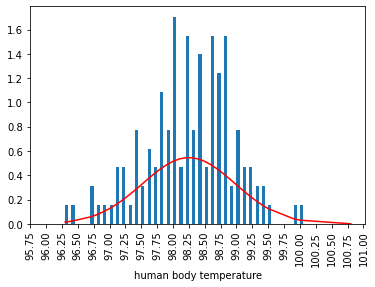

Average (Mu): 98.24923076923076 / Standard Deviation: 0.7303577789050376


In [17]:
observed_temperatures = df['Temperature'].sort_values()#将参数导入
#按从小到大的顺序进行
bin_val = np.arange(start= observed_temperatures.min(), stop= observed_temperatures.max(), step = .05)  # 创建一个等差数列
mu, std = np.mean(observed_temperatures), np.std(observed_temperatures)#均值和方差
 
 
p = norm.pdf(observed_temperatures, mu, std)#画出pdf
 
 
plt.hist(observed_temperatures,bins = bin_val, density=True, stacked=True)#直方图
plt.plot(observed_temperatures, p, color = 'red')

plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)  #x轴刻度
plt.xlabel('Human Body Temperature Distributions')
plt.xlabel('human body temperature')
plt.show()
 
 
print('Average (Mu): '+ str(mu) + ' / ' 'Standard Deviation: '+str(std))

Shapiro-Wilk Stat: 0.9865770936012268  Shapiro-Wilk p-Value: 0.233174666762352
********************
normaltest
k2 2.703801433319236 p: 0.2587479863488212


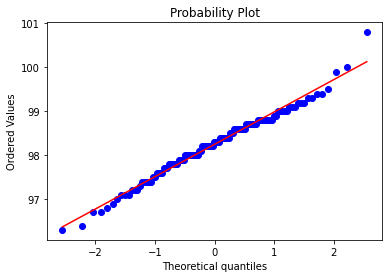

In [21]:
x = observed_temperatures
 
#Shapiro-Wilk Test: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
shapiro_test, shapiro_p = scipy.stats.shapiro(x)   # 夏皮罗-威尔克检验（Shapiro–Wilk test）,该检验的零检验是样本来自于一个正态分布的母体。


print("Shapiro-Wilk Stat:",shapiro_test, " Shapiro-Wilk p-Value:", shapiro_p)
print("**"*10)


print("normaltest")
k2, p = scipy.stats.normaltest(observed_temperatures)
print("k2",k2,'p:',p)
 
 
#Another method to determining normality is through Quantile-Quantile Plots.
scipy.stats.probplot(observed_temperatures, dist="norm", plot=pylab)
pylab.show()
 

Mean temperature:  98.24923076923076 with standard deviation of +/- 0.730357778905038


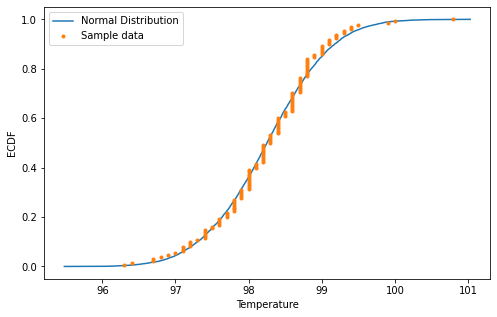

In [22]:
def ecdf(data):
    #Compute ECDF
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
 
# Compute empirical mean and standard deviation
 
# Number of samples
n = len(df['Temperature']) 
 
# Sample mean
mu = np.mean(df['Temperature']) 
 
# Sample standard deviation
std = np.std(df['Temperature']) 
 
print('Mean temperature: ', mu, 'with standard deviation of +/-', std)
 
#Random sampling of the data based off of the mean of the data.
normalized_sample = np.random.normal(mu, std, size=10000)
x_temperature, y_temperature = ecdf(df['Temperature'])
normalized_x, normalized_y = ecdf(normalized_sample)
 
# Plot the ECDFs
fig = plt.figure(figsize=(8, 5))
plt.plot(normalized_x, normalized_y)
plt.plot(x_temperature, y_temperature, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Temperature')
plt.legend(('Normal Distribution', 'Sample data'))

本文使用Python构造经验累积分布函数 (Empirical Cumulative Distribution Function)，验证格利文科定理（Glivenko–Cantelli Theorem）：从总体中抽取容量为n的样本，样本容量n越大，样本的分布越趋近于总体分布。

有学者提出98.6是人类的平均体温，我们该这样认为吗？

在这里我们选择t检验，因为我们只能计算样本的标准差。

In [24]:
from scipy import stats
 
CW_mu = 98.6
stats.ttest_1samp(df['Temperature'], CW_mu, axis=0)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

 男性和女性的体温有明显差异吗？

两独立样本t检验 H0: 没有明显差异 H1: 有明显差异



In [25]:
female_temp = df.Temperature[df.Gender == 2]
male_temp = df.Temperature[df.Gender == 1]
mean_female_temp = np.mean(female_temp)
mean_male_temp = np.mean(male_temp)
print('Average female body temperature = ' + str(mean_female_temp))
print('Average male body temperature = ' + str(mean_male_temp))
 
# Compute independent t-test 
stats.ttest_ind(female_temp, male_temp, axis=0)

Average female body temperature = 98.39384615384616
Average male body temperature = 98.1046153846154


Ttest_indResult(statistic=2.2854345381654984, pvalue=0.02393188312240236)